In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import tensorflow_io as tfio
import IPython.display as ipd

In [7]:
train_directory = './data/data/train/'
test_directory = './data/data/test/'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory, labels='inferred', label_mode='int', image_size=(256, 256), seed=123,
    validation_split=0.2, subset='validation')

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory, labels='inferred', label_mode='int', image_size=(256, 256),
    validation_split=None, subset=None)

class_names = train_ds.class_names
print(class_names)

Found 1332 files belonging to 2 classes.
Using 266 files for validation.
Found 668 files belonging to 2 classes.


2023-01-28 18:43:42.810177: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


['no', 'yes']


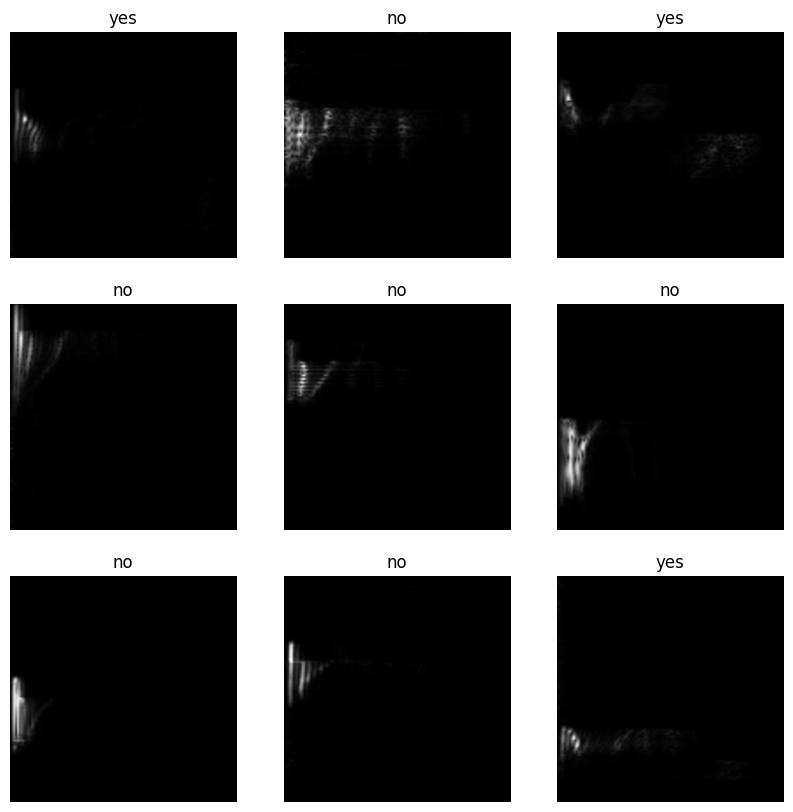

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
num_classes = 2
img_height = 256
img_width = 256

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [10]:
learning_rate = 0.125

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ['accuracy']
model.compile(optimizer, loss_fn, metrics)

In [11]:
# Set the epocks
epochs = 15
print('\nFitting:')

# Train the model.
history = model.fit(train_ds, epochs=epochs)


Fitting:
Epoch 1/15
9/9 [==============================] - 8s 770ms/step - loss: 0.6389 - accuracy: 0.6203
Epoch 2/15
9/9 [==============================] - 7s 709ms/step - loss: 0.6106 - accuracy: 0.6729
Epoch 3/15
9/9 [==============================] - 6s 654ms/step - loss: 0.5517 - accuracy: 0.7444
Epoch 4/15
9/9 [==============================] - 7s 716ms/step - loss: 0.5577 - accuracy: 0.7406
Epoch 5/15
9/9 [==============================] - 7s 716ms/step - loss: 0.4000 - accuracy: 0.8271
Epoch 6/15
9/9 [==============================] - 7s 728ms/step - loss: 0.4920 - accuracy: 0.7331
Epoch 7/15
9/9 [==============================] - 7s 729ms/step - loss: 0.4297 - accuracy: 0.8083
Epoch 8/15
9/9 [==============================] - 7s 735ms/step - loss: 0.2989 - accuracy: 0.8609
Epoch 9/15
9/9 [==============================] - 7s 707ms/step - loss: 0.4831 - accuracy: 0.8045
Epoch 10/15
9/9 [==============================] - 6s 662ms/step - loss: 0.2205 - accuracy: 0.8985
Epoch 11/

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [13]:
correct = 0
batch_size = 0
for batch_num, (X, Y) in enumerate(test_ds):
    batch_size = len(Y)
    pred = model.predict(X)
    for i in range(batch_size):
        predicted = np.argmax(pred[i], axis=-1)
        actual = Y[i]
        #print(f'predicted {predicted}, actual {actual}')
        if predicted == actual:
            correct += 1
    break

print(f'Number correct: {correct} out of {batch_size}')
print(f'Accuracy {correct / batch_size}')

1/1 [==============================] - 0s 479ms/step
Number correct: 26 out of 32
Accuracy 0.8125
